<h1 style='color:Blue' align="center"> Electrical Vehicle Segmentation </h1>

# Electric Vehicle dataset

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.features.pca import PCADecomposition

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Data Collection

In [2]:
df = pd.read_csv("EV.csv")
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


## EDA


**Checking**
* first three rows
* variable names
* sample size
* data type
* null values
* distribution
* Outliers
* Relationship b/w features
* More deeper visualization

In [3]:
df.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440


In [4]:
df.Segment.value_counts()

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

In [5]:
df.shape

(103, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [7]:
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

**Checking null values**

In [8]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

**distribution**

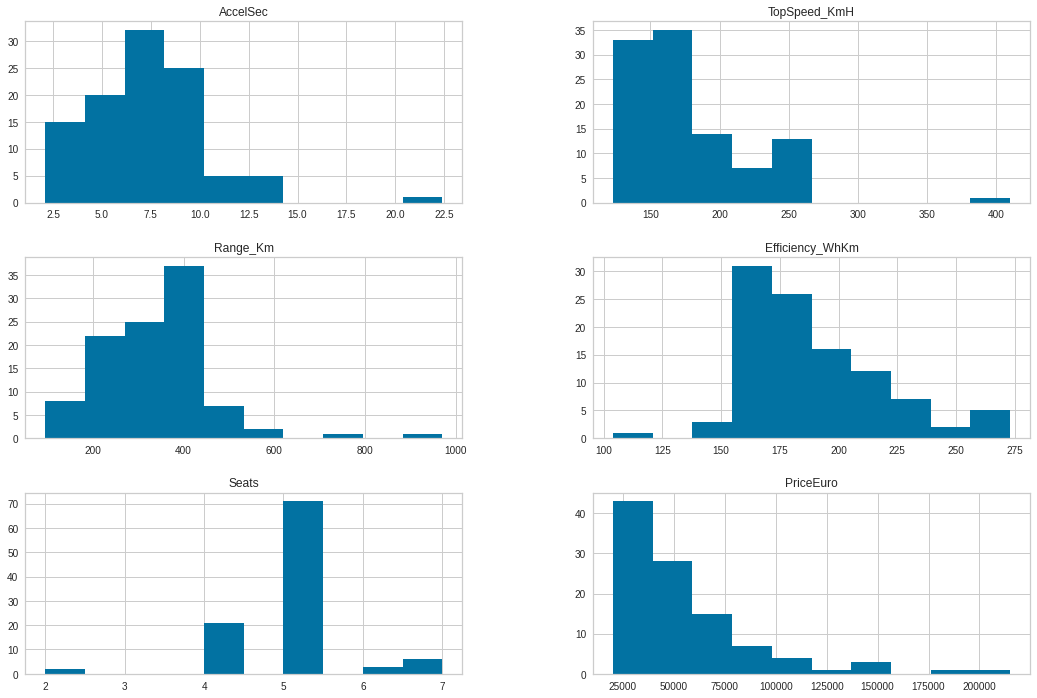

In [9]:
df.hist(figsize=(18,12));

**Outliers checking**

In [10]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


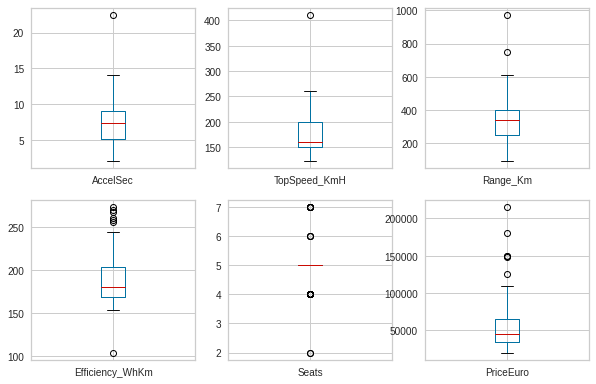

In [11]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10));

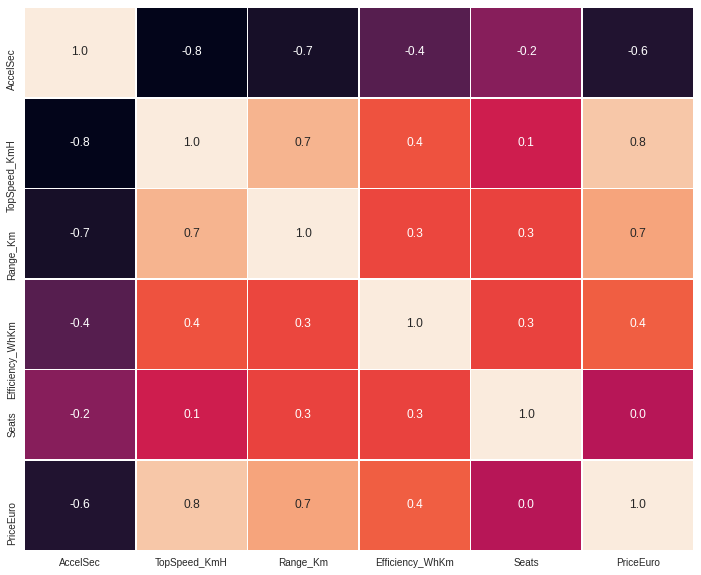

In [12]:
# Relationship b/w features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', cbar=False);

### More deeper visualization

Adding one more column for futher analysis

Dividing dataframe based on price for easier analysis

In [13]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros' 
t2 = 'More than 50,000 Euros'
df_1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FullName
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,Volkswagen -ID.3 Pure
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,Honda -e
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900,Volkswagen -e-Golf
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682,Peugeot -e-208
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380,Tesla -Model 3 Standard Range Plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Fiat,500e Convertible,9.0,150,250,168,330,Yes,FWD,Type 2 CCS,Cabrio,B,4,37900,Fiat -500e Convertible
95,Volkswagen,ID.3 Pro Performance,7.3,160,340,171,470,Yes,RWD,Type 2 CCS,Hatchback,C,5,35575,Volkswagen -ID.3 Pro Performance
96,Kia,e-Soul 39 kWh,9.9,157,230,170,220,Yes,FWD,Type 2 CCS,SUV,B,5,33133,Kia -e-Soul 39 kWh
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000,Nissan -Ariya 63kWh


**Counting plots for power train and body style**

In [14]:
def power_train(dataframe): 
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)

In [15]:
def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()

**Function to plot range of vehicles**

In [16]:
def range(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'Range_Km' , data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

**Acceleration (0 - 100Km/Hr)**

In [17]:
def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'AccelSec', data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Acceleration 0-100 Km  of EV's costing {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleration (seconds)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

**Range vs Price**

In [18]:
def range_price(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs PRICE (Euros)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Price (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

**Range vs Efficiency**

In [19]:
def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'darkseagreen')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

**Funtion for fast charging data:**

In [20]:
def fastcharge(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'FastCharge_KmH' , data = dataframe, color = 'lightslategrey')
  plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Charging Capacity (kmH)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

**Visualising the Data**

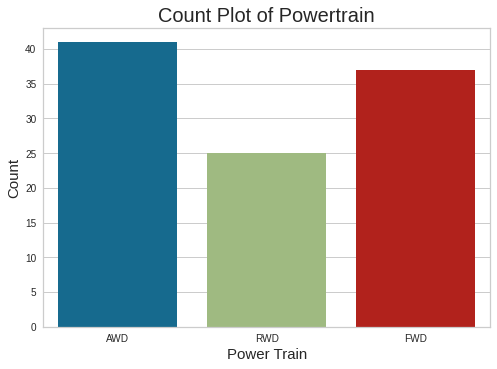

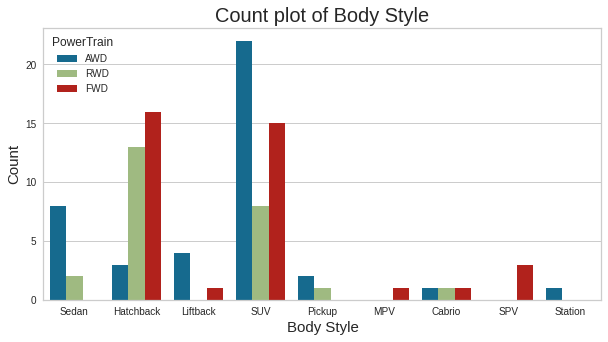

In [21]:
power_train(df)
bodystyle(df)

/home/programmer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


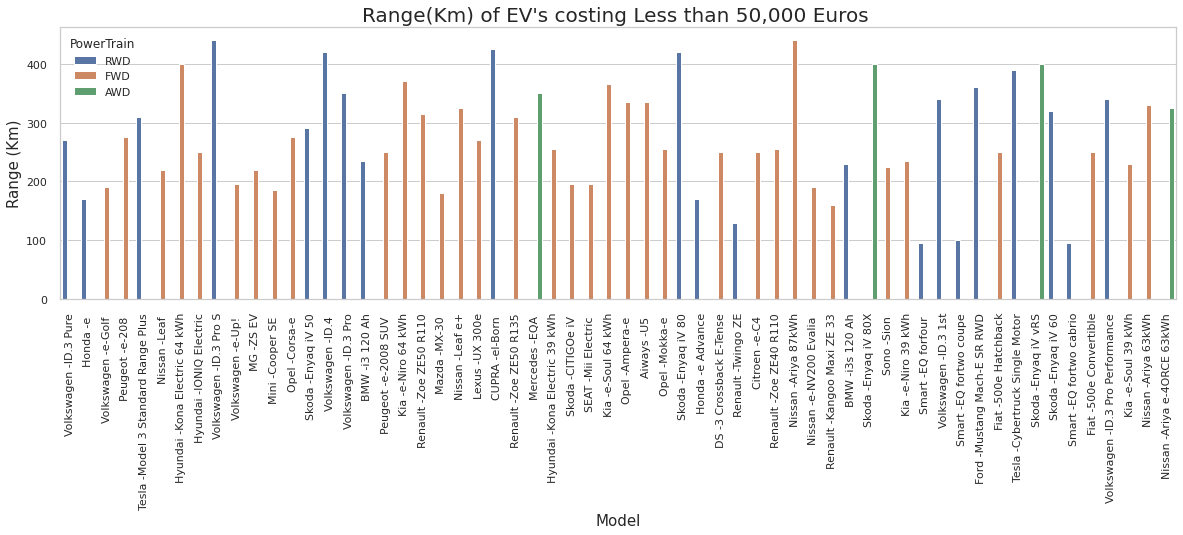

/home/programmer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


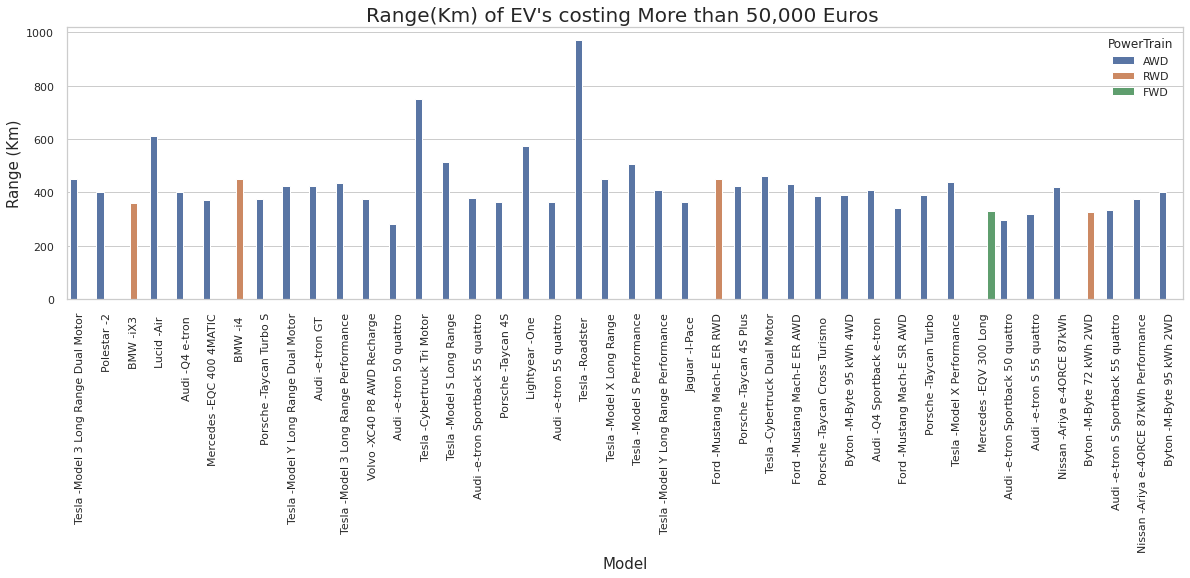

In [22]:
# Bar Graphs
range(df_1, t1)
range(df_2, t2)

/home/programmer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


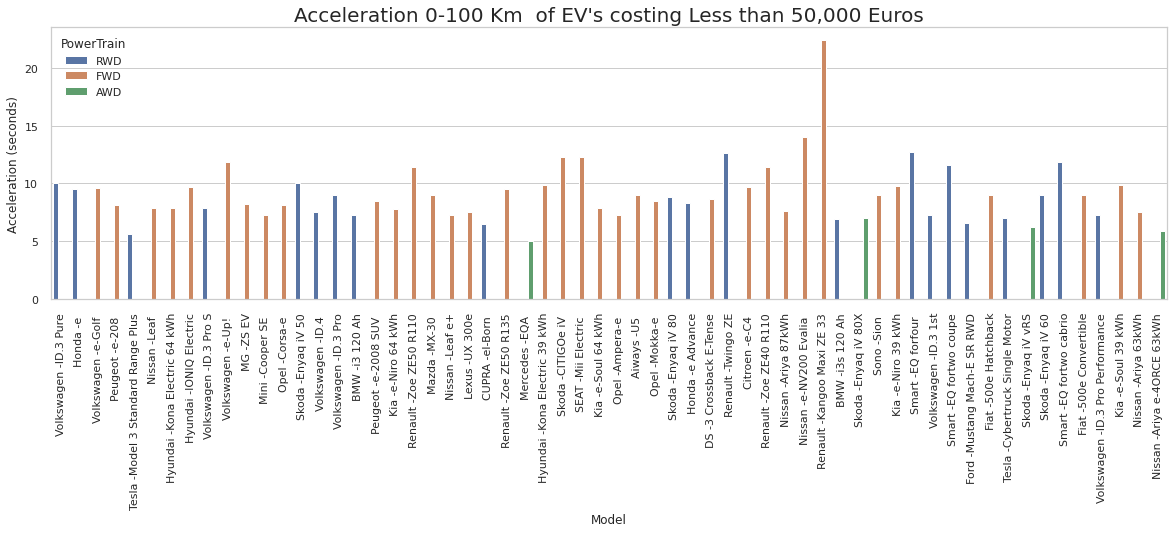

/home/programmer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


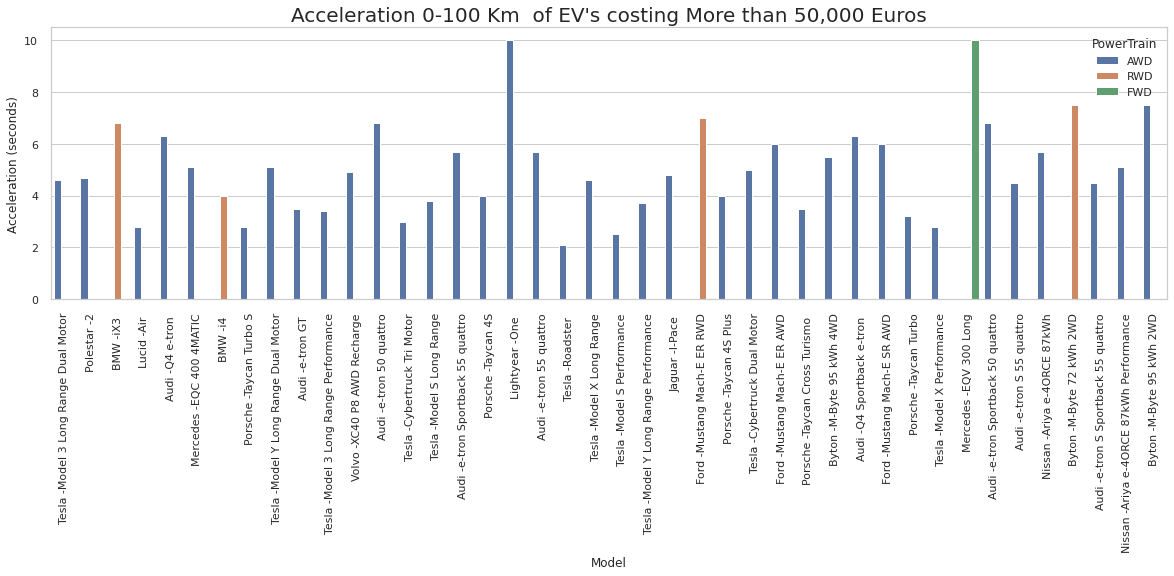

In [23]:
# Acceleration
acc(df_1, t1)
acc(df_2, t2)

<ipython-input-18-b4420112d778>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


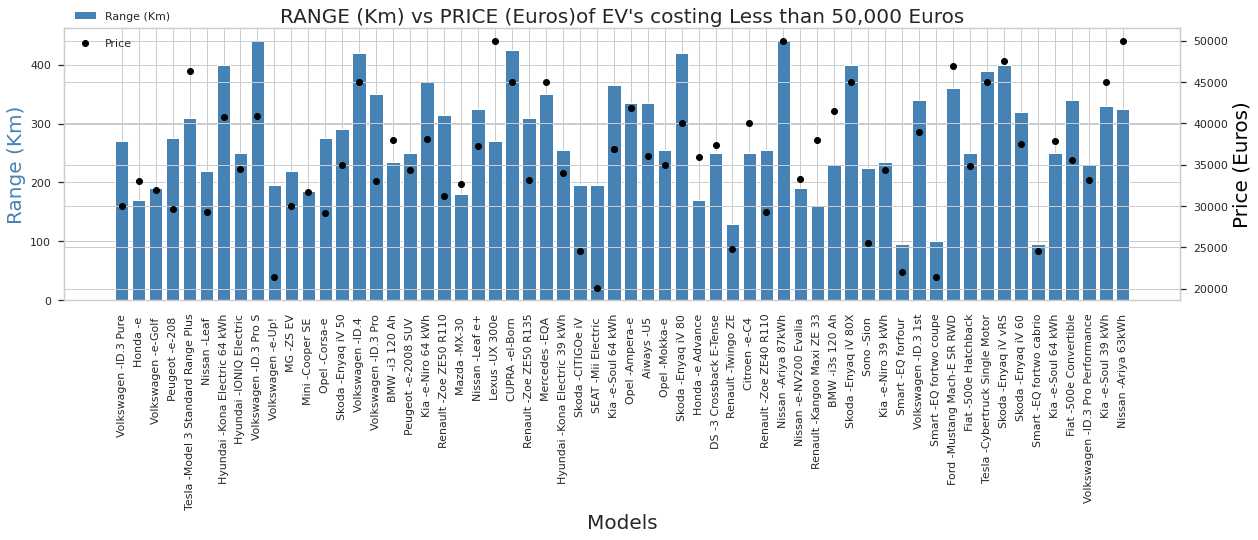

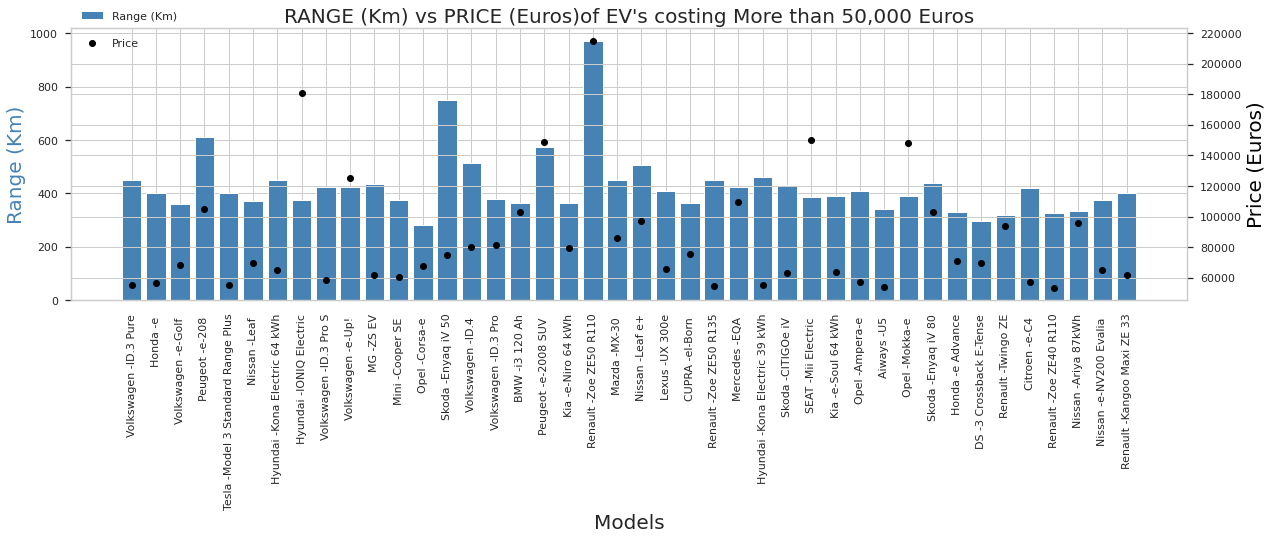

In [24]:
# price vs acceleration
range_price(df_1, t1)
range_price(df_2, t2)

<ipython-input-19-248bd1e2ddaa>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


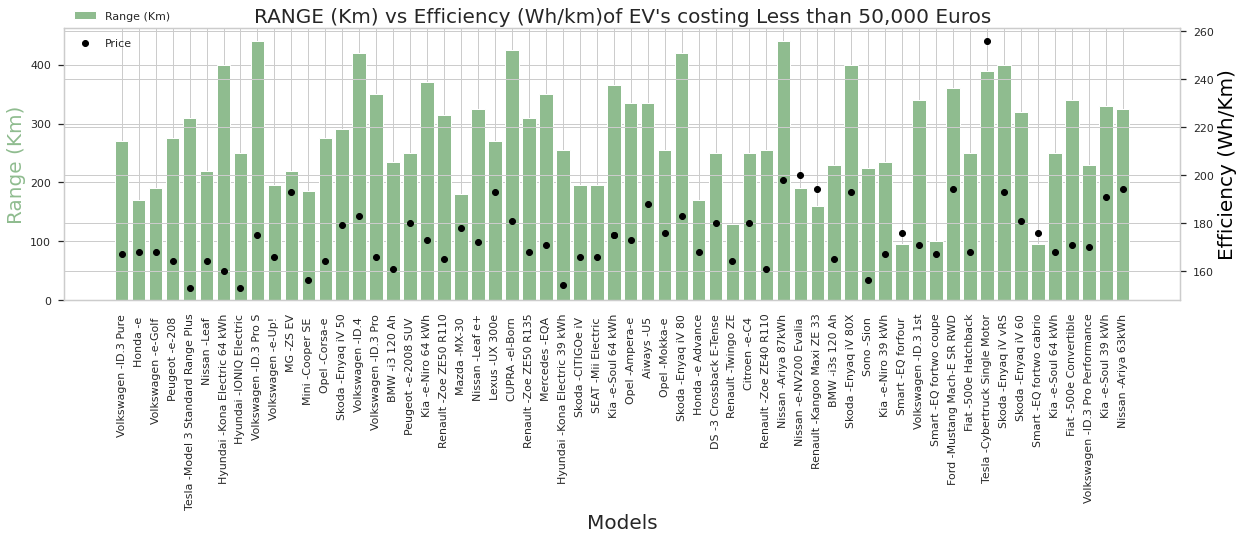

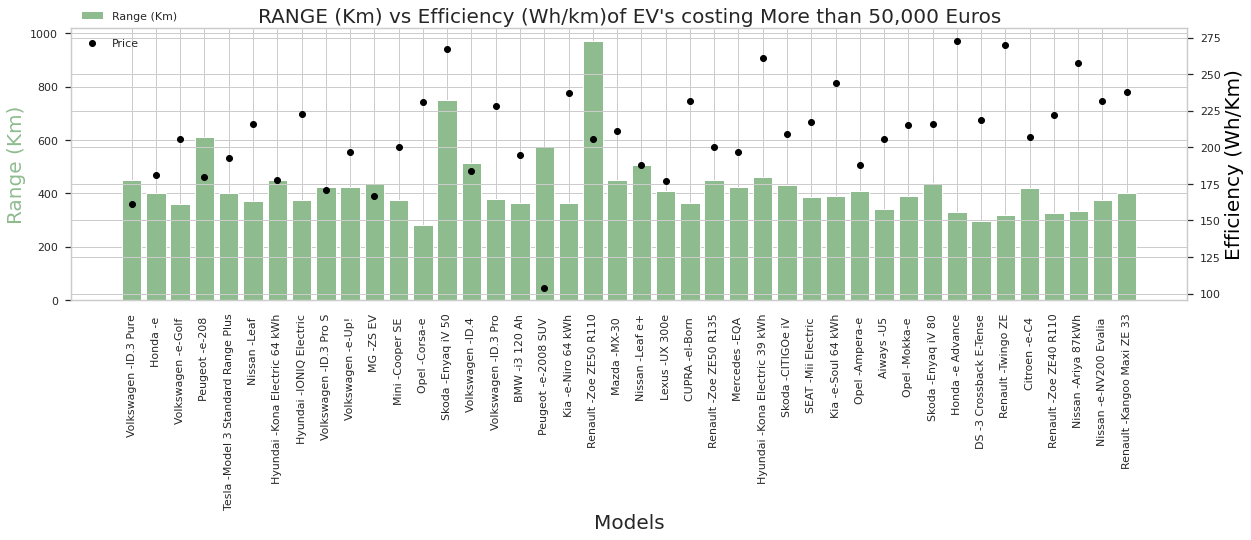

In [25]:
# range vs efficiency
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

**Vehicles having max range(km) which costs under 50k Euros**

In [26]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['FullName', 'Range_Km', 'PriceEuro', 'RapidCharge']])

                      FullName  Range_Km  PriceEuro RapidCharge
15      Volkswagen -ID.3 Pro S       440      40936         Yes
62         Nissan -Ariya 87kWh       440      50000         Yes
37             CUPRA -el-Born        425      45000         Yes
53          Skoda -Enyaq iV 80       420      40000         Yes
25           Volkswagen -ID.4        420      45000         Yes
..                         ...       ...        ...         ...
68  Renault -Kangoo Maxi ZE 33       160      38000          No
57          Renault -Twingo ZE       130      24790          No
82      Smart -EQ fortwo coupe       100      21387          No
91     Smart -EQ fortwo cabrio        95      24565          No
77          Smart -EQ forfour         95      22030          No

[61 rows x 4 columns]


**Vehicle having max range(Km) costing more than 50k Euros**

In [27]:
pd.set_option('display.max_columns', None)
top_range_2 = df_2.sort_values(by= 'Range_Km', ascending= False)
print(top_range_2[['FullName', 'Range_Km','PriceEuro', 'RapidCharge']])

                                    FullName  Range_Km  PriceEuro RapidCharge
51                          Tesla -Roadster        970     215000         Yes
33               Tesla -Cybertruck Tri Motor       750      75000         Yes
5                                Lucid -Air        610     105000         Yes
48                           Lightyear -One        575     149000         Yes
40                 Tesla -Model S Long Range       515      79990         Yes
59                Tesla -Model S Performance       505      96990         Yes
67              Tesla -Cybertruck Dual Motor       460      55000         Yes
64               Ford -Mustang Mach-E ER RWD       450      54475         Yes
54                 Tesla -Model X Long Range       450      85990         Yes
0       Tesla -Model 3 Long Range Dual Motor       450      55480         Yes
13                                  BMW -i4        450      65000         Yes
81                Tesla -Model X Performance       440     10299

**Vehicles with best acceleration under 50k Euros**

In [28]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['FullName','AccelSec', 'Range_Km', 'PowerTrain','PriceEuro']])

                               FullName  AccelSec  Range_Km PowerTrain  \
39                       Mercedes -EQA        5.0       350        AWD   
8    Tesla -Model 3 Standard Range Plus       5.6       310        RWD   
100         Nissan -Ariya e-4ORCE 63kWh       5.9       325        AWD   
88                  Skoda -Enyaq iV vRS       6.2       400        AWD   
37                      CUPRA -el-Born        6.5       425        RWD   
..                                  ...       ...       ...        ...   
43                   Skoda -CITIGOe iV       12.3       195        FWD   
57                   Renault -Twingo ZE      12.6       130        RWD   
77                   Smart -EQ forfour       12.7        95        RWD   
66              Nissan -e-NV200 Evalia       14.0       190        FWD   
68           Renault -Kangoo Maxi ZE 33      22.4       160        FWD   

     PriceEuro  
39       45000  
8        46380  
100      50000  
88       47500  
37       45000  
..       

**Vehicles with best acceleration costing over 50k Euros**

In [29]:
pd.set_option('display.max_columns', None)
acceleration_2 = df_2.sort_values(by= 'AccelSec')
print(acceleration_2[['FullName','AccelSec', 'Range_Km', 'PowerTrain','PriceEuro']])

                                    FullName  AccelSec  Range_Km PowerTrain  \
51                          Tesla -Roadster        2.1       970        AWD   
59                Tesla -Model S Performance       2.5       505        AWD   
5                                Lucid -Air        2.8       610        AWD   
81                Tesla -Model X Performance       2.8       440        AWD   
16                   Porsche -Taycan Turbo S       2.8       375        AWD   
33               Tesla -Cybertruck Tri Motor       3.0       750        AWD   
79                     Porsche -Taycan Turbo       3.2       390        AWD   
24     Tesla -Model 3 Long Range Performance       3.4       435        AWD   
23                          Audi -e-tron GT        3.5       425        AWD   
72            Porsche -Taycan Cross Turismo        3.5       385        AWD   
61     Tesla -Model Y Long Range Performance       3.7       410        AWD   
40                 Tesla -Model S Long Range       3

**Number of vehicles produced by each brand**

In [30]:
companies = df.groupby('Brand').count()
print(companies['Model'].sort_values(ascending = False))

Brand
Tesla          13
Audi            9
Volkswagen      8
Nissan          8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Opel            3
Smart           3
Byton           3
Hyundai         3
Mercedes        3
Fiat            2
Honda           2
Peugeot         2
DS              1
Citroen         1
CUPRA           1
Volvo           1
MG              1
Jaguar          1
Lexus           1
Lightyear       1
Lucid           1
Mazda           1
Mini            1
Polestar        1
SEAT            1
Sono            1
Aiways          1
Name: Model, dtype: int64


**Vehicles with maximum efficiency**

In [31]:
pd.set_option('display.max_columns', None)
eff = df.sort_values(by= 'Efficiency_WhKm')
print(eff[['FullName','Efficiency_WhKm', 'Range_Km', 'PowerTrain','PriceEuro']])

                               FullName  Efficiency_WhKm  Range_Km PowerTrain  \
48                      Lightyear -One               104       575        AWD   
8    Tesla -Model 3 Standard Range Plus              153       310        RWD   
14              Hyundai -IONIQ Electric              153       250        FWD   
41        Hyundai -Kona Electric 39 kWh              154       255        FWD   
74                          Sono -Sion               156       225        FWD   
..                                  ...              ...       ...        ...   
99  Audi -e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla -Cybertruck Dual Motor              261       460        AWD   
33          Tesla -Cybertruck Tri Motor              267       750        AWD   
90            Audi -e-tron S 55 quattro              270       320        AWD   
84               Mercedes -EQV 300 Long              273       330        FWD   

    PriceEuro  
48     1490

**Conclusions**

1. EV's which cost less have higher acceleration(0-100 Km/Hr) time in order to maximize range.

2. High performance EV's have lower efficiency.

3. Most of the vehicles costing less than 50,000 Euros are Front Wheel Drive.

4. Most of the vehicles costing over 50,000 Euros are either All wheel drive or Rear wheel drive and have better acceleration

## Feature Enginnering

**Drop unnecessary columns**

In [32]:
df.drop(["Brand", "Model", "BodyStyle"], axis=1, inplace=True)
df.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceEuro,FullName
0,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,D,5,55480,Tesla -Model 3 Long Range Dual Motor
1,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,C,5,30000,Volkswagen -ID.3 Pure
2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,D,5,56440,Polestar -2
3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,D,5,68040,BMW -iX3
4,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,B,4,32997,Honda -e


**Display name, type and unique values of each column**

In [33]:
for data in df:
    print(f'{df[data].name} "{df[data].dtype}"')
    print(df[data].unique())
    print(100*"-")

AccelSec "float64"
[ 4.6 10.   4.7  6.8  9.5  2.8  9.6  8.1  5.6  6.3  5.1  7.9  4.   9.7
 11.9  8.2  7.3  3.5  3.4  7.5  9.   4.9  8.5  7.8 11.4  3.   6.5  5.
  3.8  9.9  5.7 12.3  2.1  8.8  8.3  8.7 12.6  2.5  3.7  7.6  4.8  7.
 14.  22.4  6.   6.9  5.5  9.8 12.7  3.2 11.6  6.6  6.2  4.5  5.9]
----------------------------------------------------------------------------------------------------
TopSpeed_KmH "int64"
[233 160 210 180 145 250 150 225 144 167 200 165 260 130 140 217 240 261
 190 135 157 155 410 241 123]
----------------------------------------------------------------------------------------------------
Range_Km "int64"
[450 270 400 360 170 610 190 275 310 370 220 250 440 375 195 185 425 290
 435 420 350 235 280 315 750 180 325 515 255 380 365 335 575 970 130 505
 410 460 160 430 230 385 390 225  95 340 100 330 295 320]
----------------------------------------------------------------------------------------------------
Efficiency_WhKm "int64"
[161 167 181 206 168 180 164 15

**Transforming "FastCharge_km" column data type along with some replacement**

In [34]:
df['FastCharge_KmH'].replace('-','0', inplace=True)
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype('int64')
df['FastCharge_KmH'].replace(0, df.FastCharge_KmH.median(), inplace=True)
df['FastCharge_KmH'].dtype

dtype('int64')

In [35]:
numerical_columns = [column for column in df.columns 
                     if df[column].dtype in ["int64", "float64"]]
numerical_columns

['AccelSec',
 'TopSpeed_KmH',
 'Range_Km',
 'Efficiency_WhKm',
 'FastCharge_KmH',
 'Seats',
 'PriceEuro']

In [36]:
categorical_columns = [column for column in df.columns 
                     if df[column].dtype not in ["int64", "float64"]]
categorical_columns

['RapidCharge', 'PowerTrain', 'PlugType', 'Segment', 'FullName']

In [37]:
df_copy = df.copy()
df_copy.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceEuro,FullName
0,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,D,5,55480,Tesla -Model 3 Long Range Dual Motor
1,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,C,5,30000,Volkswagen -ID.3 Pure
2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,D,5,56440,Polestar -2
3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,D,5,68040,BMW -iX3
4,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,B,4,32997,Honda -e


**Label encoding**

In [38]:
encoder = LabelEncoder()

for col in categorical_columns:
    df_copy[col]=encoder.fit_transform(df_copy[col])

In [39]:
df_copy.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceEuro,FullName
0,4.6,233,450,161,940,1,0,2,3,5,55480,83
1,10.0,160,270,167,250,1,2,2,2,5,30000,97
2,4.7,210,400,181,620,1,0,2,3,5,56440,58
3,6.8,180,360,206,560,1,2,2,3,5,68040,13
4,9.5,145,170,168,190,1,2,2,1,4,32997,26


In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccelSec         103 non-null    float64
 1   TopSpeed_KmH     103 non-null    int64  
 2   Range_Km         103 non-null    int64  
 3   Efficiency_WhKm  103 non-null    int64  
 4   FastCharge_KmH   103 non-null    int64  
 5   RapidCharge      103 non-null    int64  
 6   PowerTrain       103 non-null    int64  
 7   PlugType         103 non-null    int64  
 8   Segment          103 non-null    int64  
 9   Seats            103 non-null    int64  
 10  PriceEuro        103 non-null    int64  
 11  FullName         103 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 9.8 KB


**handling outliers**

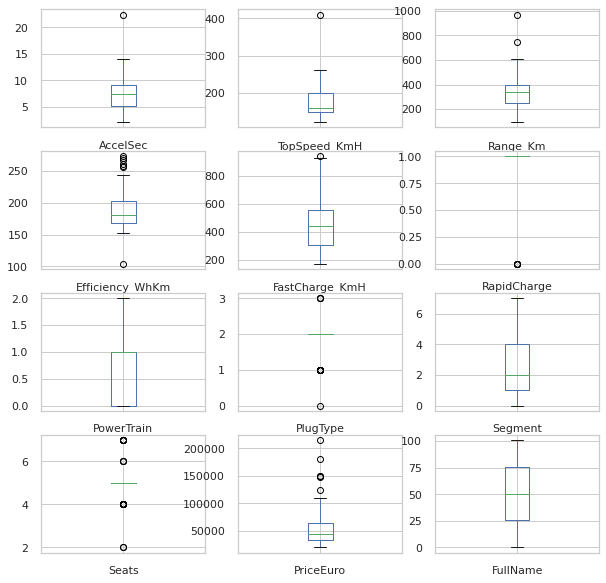

In [41]:
df_copy.plot(kind='box', subplots=True, layout=(4,3), sharex=False,sharey=False ,figsize =(10,10));

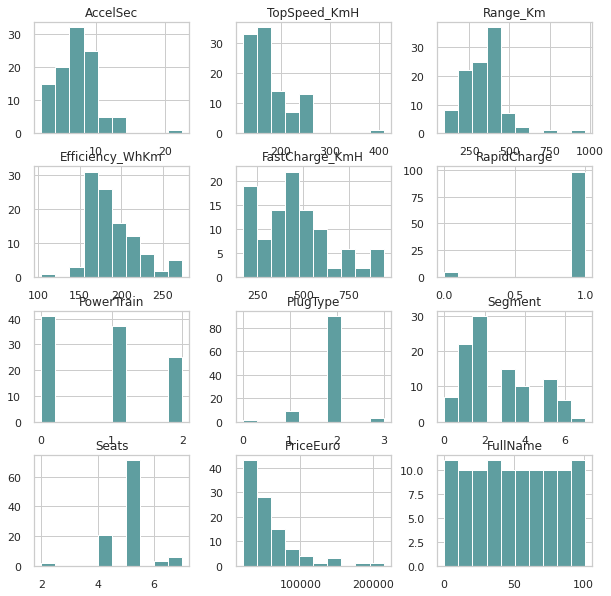

In [42]:
df_copy.hist(figsize = (10,10), color = "#5F9EA0");

In [43]:
def Boundary_GD(feature, name):
    '''
    We use below method if follow a Gaussian Distribution
    
    ''' 

    uppper_boundary=feature.mean() + 2* feature.std()
    lower_boundary=feature.mean() - 2* feature.std()

    print(name), print(lower_boundary), print(uppper_boundary),print(feature.mean())
    print(10*'-')

In [44]:
Boundary_GD(df_copy.AccelSec, 'AccelSec')
Boundary_GD(df_copy.TopSpeed_KmH, 'TopSpeed_KmH')
Boundary_GD(df_copy.Range_Km, 'Range_Km')
Boundary_GD(df_copy.Efficiency_WhKm, 'Efficiency_WhKm')

AccelSec
1.361255534992151
13.430977474716585
7.396116504854368
----------
TopSpeed_KmH
92.048113794282
266.3402357202811
179.19417475728156
----------
Range_Km
86.75751890226672
590.8152966317139
338.7864077669903
----------
Efficiency_WhKm
130.03137008190365
248.298727005475
189.16504854368932
----------


In [45]:
df_copy.loc[df_copy['AccelSec']>=13,'AccelSec']=13
df_copy.loc[df_copy['TopSpeed_KmH']>=266,'TopSpeed_KmH']=266
df_copy.loc[df_copy['Range_Km']>=590,'Range_Km']=590
df_copy.loc[df_copy['Efficiency_WhKm']>=248,'Efficiency_WhKm']=248

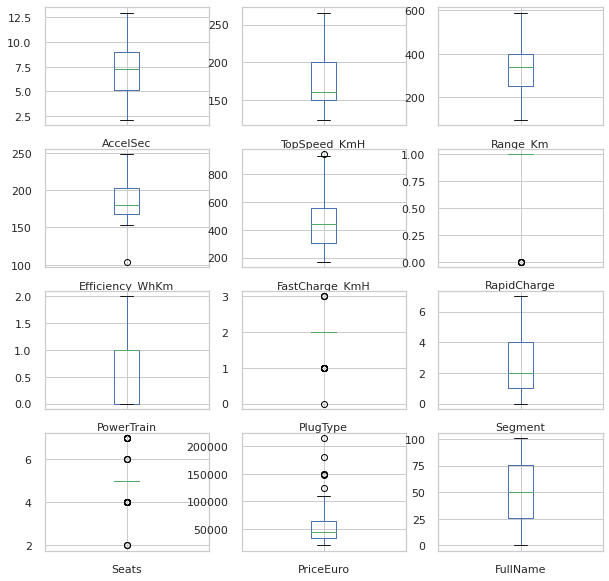

In [46]:
df_copy.plot(kind='box', subplots=True, layout=(4,3), sharex=False,sharey=False ,figsize =(10,10));

**feature scaling**

In [47]:
df_copy.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceEuro,FullName
0,4.6,233,450,161,940,1,0,2,3,5,55480,83
1,10.0,160,270,167,250,1,2,2,2,5,30000,97
2,4.7,210,400,181,620,1,0,2,3,5,56440,58
3,6.8,180,360,206,560,1,2,2,3,5,68040,13
4,9.5,145,170,168,190,1,2,2,1,4,32997,26


In [48]:
df_scal = df_copy[['AccelSec','TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH','RapidCharge', 'Seats', 'PriceEuro']]
df_scal.head()

,AccelSec,TopSpeed_KmH,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro
0,4.6,233,161,940,1,5,55480
1,10.0,160,167,250,1,5,30000
2,4.7,210,181,620,1,5,56440
3,6.8,180,206,560,1,5,68040
4,9.5,145,168,190,1,4,32997


In [49]:
scaler = StandardScaler()
df_scal = scaler.fit_transform(df_scal)

In [50]:
df_scal = pd.DataFrame(df_scal, columns=['AccelSec','TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH','RapidCharge', 'Seats', 'PriceEuro'])
df_scal.head()

,AccelSec,TopSpeed_KmH,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro
0,-1.018156,1.457698,-1.003121,2.478052,0.225877,0.147109,-0.009761
1,1.021823,-0.469919,-0.782034,-1.054141,0.225877,0.147109,-0.759866
2,-0.980378,0.850367,-0.266163,0.839933,0.225877,0.147109,0.018501
3,-0.187053,0.058195,0.655034,0.532786,0.225877,0.147109,0.359993
4,0.832936,-0.866005,-0.745186,-1.361289,0.225877,-1.115578,-0.671638


## Trained model

**Hierarchical Clustering**

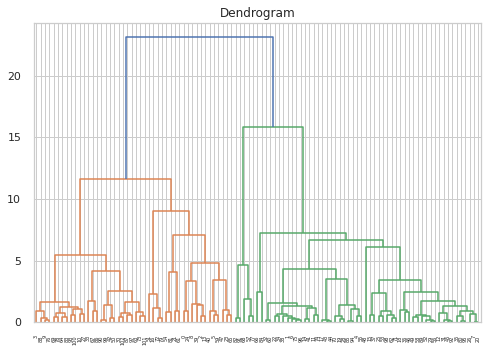

In [51]:
dendrogram = sch.dendrogram(sch.linkage(df_scal, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [52]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_scal)
y_hc

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [53]:
df_scal.head()

,AccelSec,TopSpeed_KmH,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro
0,-1.018156,1.457698,-1.003121,2.478052,0.225877,0.147109,-0.009761
1,1.021823,-0.469919,-0.782034,-1.054141,0.225877,0.147109,-0.759866
2,-0.980378,0.850367,-0.266163,0.839933,0.225877,0.147109,0.018501
3,-0.187053,0.058195,0.655034,0.532786,0.225877,0.147109,0.359993
4,0.832936,-0.866005,-0.745186,-1.361289,0.225877,-1.115578,-0.671638


In [54]:
X = df_scal.iloc[:,[0,1]].values

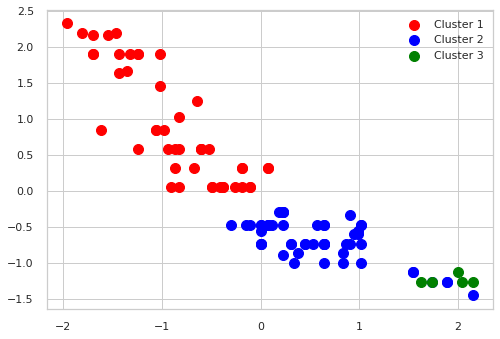

In [55]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.legend()
plt.show()

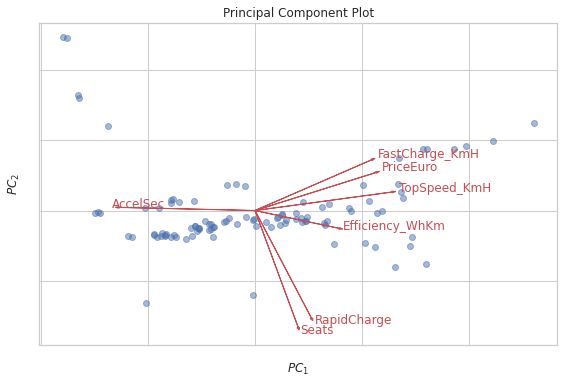

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [56]:
visualizer = PCADecomposition(proj_features=True, alpha=0.5)
visualizer.fit_transform(df_scal)
visualizer.show()

**Kmeans Clustering**

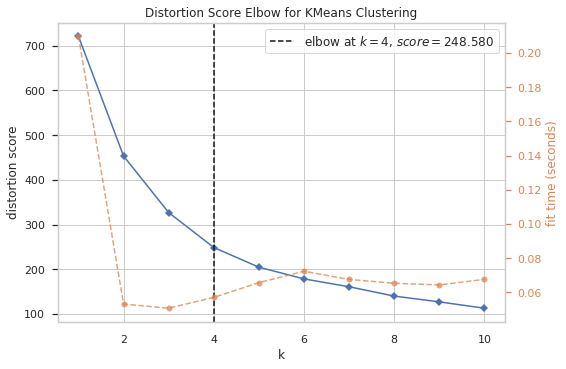

In [57]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(df_scal)
visualizer.show();

In [58]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_scal)

KMeans(n_clusters=4, random_state=42)

In [59]:
y_kmeans = kmeans.fit_predict(df_scal)
df_copy['cluster_num'] = y_kmeans

In [60]:
#To see each cluster size
from collections import Counter
count = Counter(kmeans.labels_)
count

Counter({3: 13, 1: 49, 2: 36, 0: 5})

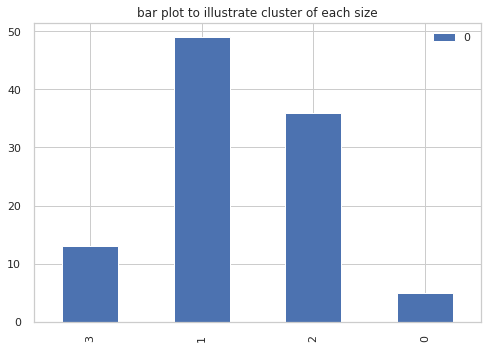

In [61]:
pd.DataFrame.from_dict(count, orient='index').plot.bar()
plt.title("bar plot to illustrate cluster of each size")
plt.show()

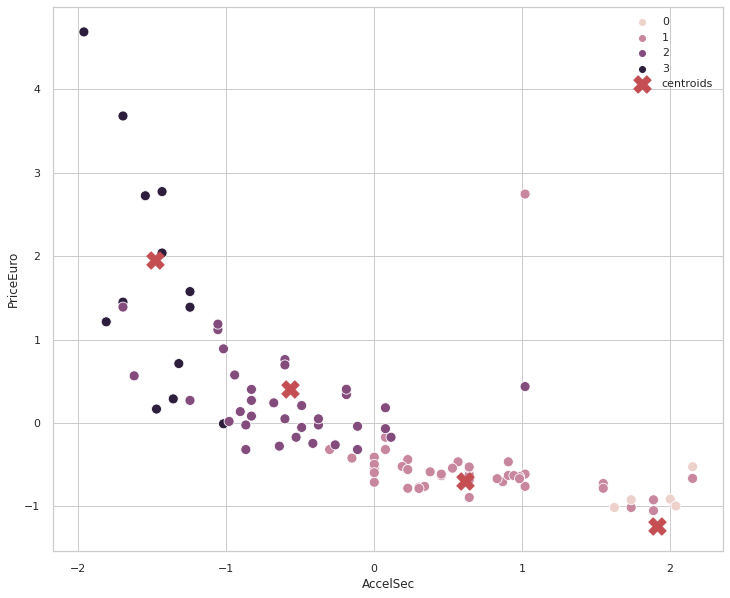

In [62]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_scal, x="AccelSec", y="PriceEuro", hue=kmeans.labels_, s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=300, label="centroids")
plt.legend()
plt.show()

In [63]:
#K-means clustering 
x = df_scal.iloc[:,[0,1]].values
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[1 2 3 3 2 1 2 2 3 3 3 2 2 3 2 2 1 0 2 2 2 3 2 1 1 2 2 3 2 2 3 2 0 1 2 2 2
 2 2 3 1 2 3 0 0 2 2 1 2 2 3 1 2 2 1 2 2 0 2 1 0 1 2 3 3 1 0 3 0 3 2 2 1 3
 2 2 3 0 3 1 2 1 0 3 2 2 3 3 3 2 3 0 2 3 2 2 2 3 2 3 3 3 3]
19.051670499946763
6
[[ 1.84949172 -1.2428864 ]
 [-1.47384549  1.87688863]
 [ 0.44202259 -0.6185948 ]
 [-0.569864    0.40322977]]


In [64]:
label=kmeans.labels_

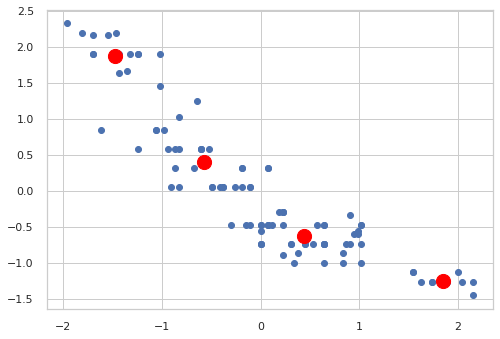

In [65]:
kmeans = KMeans(n_clusters = 4,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(x)


# Plot the data
plt.scatter(x[:,0], 
            x[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(x)

In [67]:
pca_dataframe=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_dataframe   

,pca1,pca2
0,1.750693,0.310803
1,-1.054821,0.390255
2,1.294532,-0.091932
3,0.173417,-0.091116
4,-1.201333,-0.023383
...,...,...
98,-0.387005,-0.277561
99,1.347957,-0.145358
100,0.787264,0.041903
101,1.000965,-0.171798


In [68]:
pca_df=pd.concat([pca_dataframe,pd.DataFrame({'cluster':label})],axis=1) # concatinaing ( this step we have done earlier for 7 groups)
pca_df

,pca1,pca2,cluster
0,1.750693,0.310803,1
1,-1.054821,0.390255,2
2,1.294532,-0.091932,3
3,0.173417,-0.091116,3
4,-1.201333,-0.023383,2
...,...,...,...
98,-0.387005,-0.277561,2
99,1.347957,-0.145358,3
100,0.787264,0.041903,3
101,1.000965,-0.171798,3


In [69]:
pca_df['cluster'].value_counts()

2    46
3    30
1    16
0    11
Name: cluster, dtype: int64

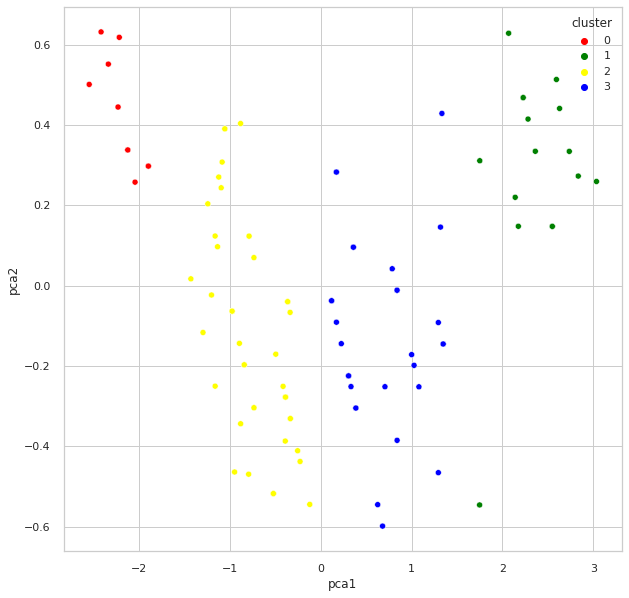

In [70]:
#ploting the scatterplot for the pca_df data(7 different clusters)
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',hue="cluster",data=pca_df,palette=['red','green','yellow','blue'])
plt.show()

## Describing Segment

In [71]:
from statsmodels.graphics.mosaicplot import mosaic

crosstab =pd.crosstab(df_copy['cluster_num'],df_copy['Seats'])
crosstab

Seats,2,4,5,6,7
cluster_num,,,,,
0,2,2,1,0,0
1,0,12,36,0,1
2,0,0,29,3,4
3,0,7,5,0,1


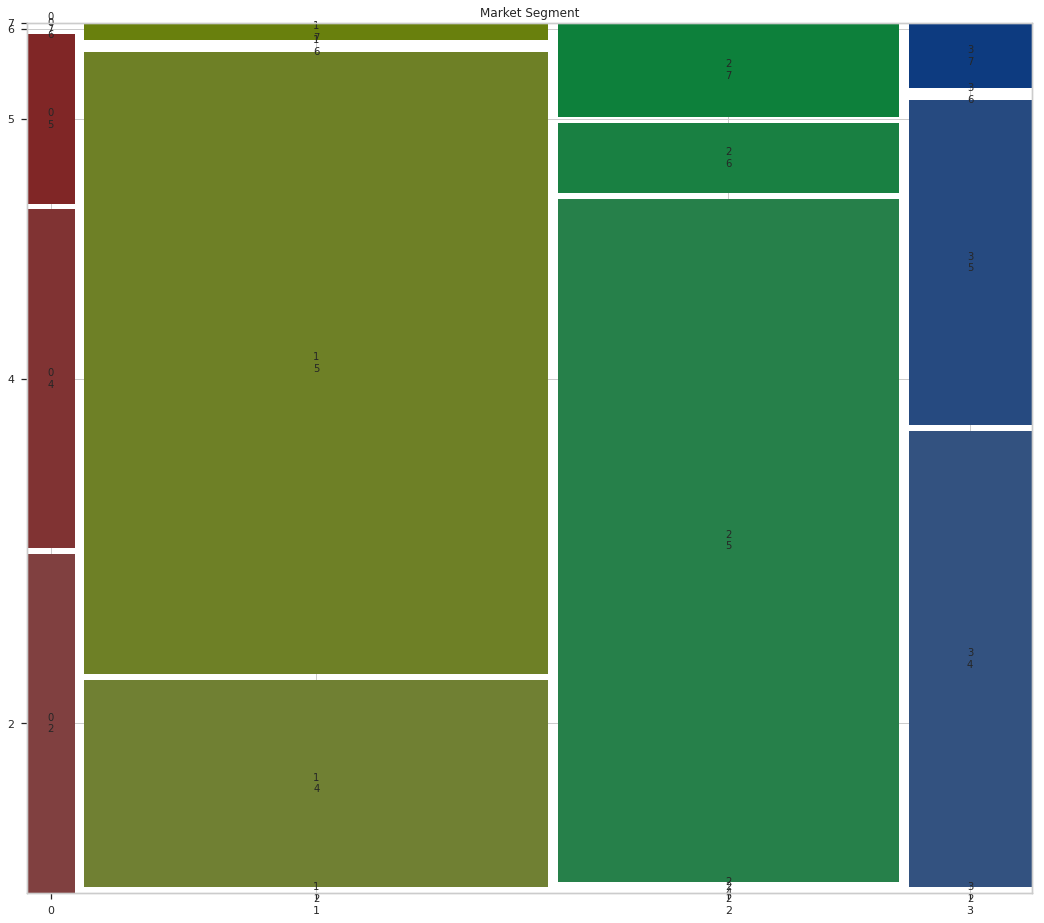

In [72]:
plt.rcParams['figure.figsize'] = (18,16)
mosaic(crosstab.stack(), gap=0.010, title="Market Segment")

plt.show()

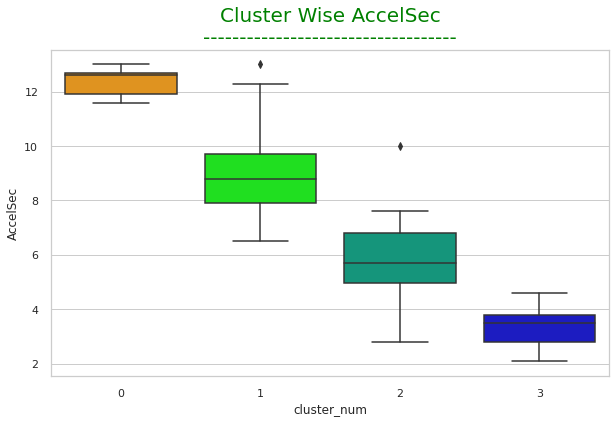

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cluster_num", y="AccelSec", data=df_copy, palette="nipy_spectral_r")
plt.title("Cluster Wise AccelSec\n-----------------------------------", fontsize=20, color="green")
plt.show()

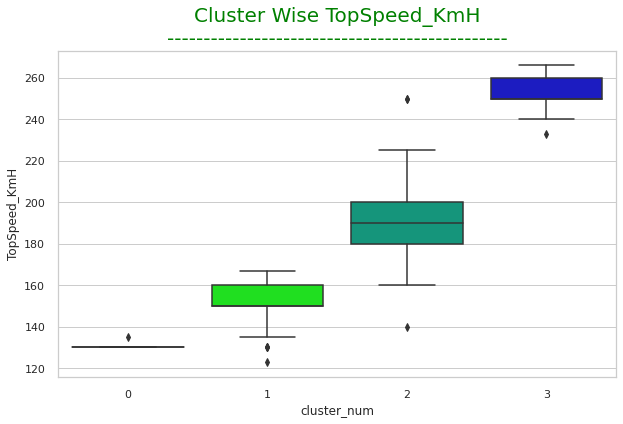

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "cluster_num",y="TopSpeed_KmH", data = df_copy,palette="nipy_spectral_r")
plt.title("Cluster Wise TopSpeed_KmH\n-----------------------------------------------", fontsize=20, color="green")
plt.show()

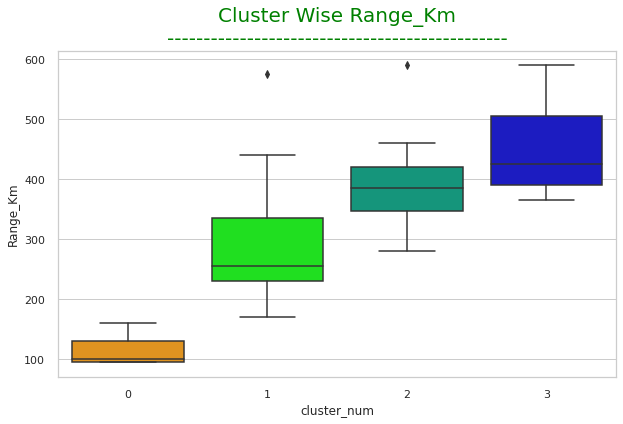

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "cluster_num",y="Range_Km", data = df_copy,palette="nipy_spectral_r")
plt.title("Cluster Wise Range_Km\n-----------------------------------------------", fontsize=20, color="green")
plt.show()

In [76]:
eff = df_copy.groupby('cluster_num')['Efficiency_WhKm'].mean()
eff = eff.to_frame().reset_index()
eff

,cluster_num,Efficiency_WhKm
0,0,175.400000
1,1,170.489796
2,2,212.472222
3,3,192.846154


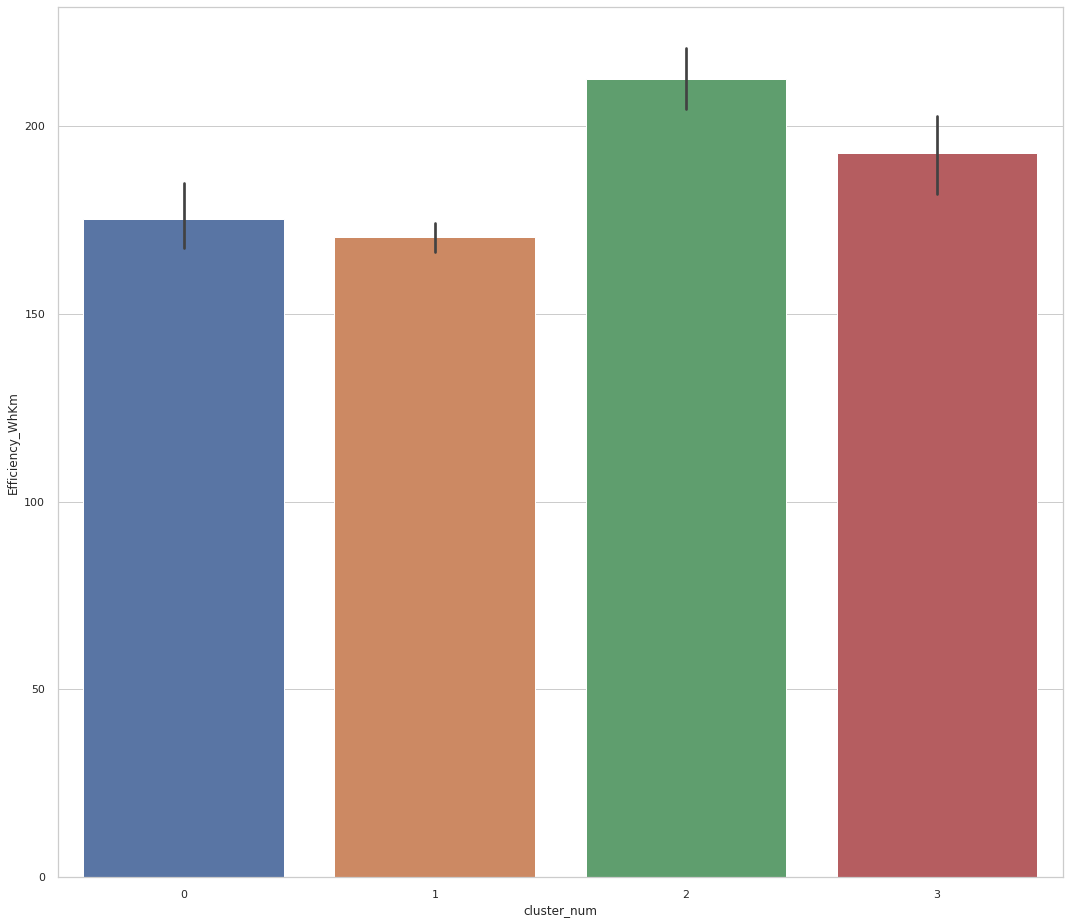

In [77]:
sns.barplot(x='cluster_num', y='Efficiency_WhKm', data=df_copy)
plt.show()

# Data for electrich vehicle charging station

In [78]:
df_charge = pd.read_csv("electric_vehicle_charging_station_list.csv")
df_charge.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [79]:
df_charge.head(-20)

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service
...,...,...,...,...,...,...,...,...,...
177,178,NDMC,"Near NDMC Office, Fire Brigade Lane, Barakhamb...","Electric Vehicle Charger, Near NDMC Office, Fi...",28.630448,77.225558,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
178,179,NDMC,"Near NDMC Office, Fire Brigade Lane, Barakhamb...","Electric Vehicle Charger, Near NDMC Office, Fi...",28.630448,77.225558,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
179,180,NDMC,"Talkatora Stadium, President's Estate, New Del...","Electric Vehicle Charger, Talkatora Stadium, P...",28.625294,77.195234,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
180,181,NDMC,"Talkatora Garden, President's Estate, New Delh...","Electric Vehicle Charger, Talkatora Garden, Pr...",28.624836,77.195244,CCS/ChADEMO/ Type 2 AC,142kW,Self Service


In [80]:
df_charge.region.unique()

array(['NDMC', 'CMRL', 'Maha Metro', 'Noida Authority', 'SDMC', 'NKDA',
       'NRANVP', 'ANERT'], dtype=object)

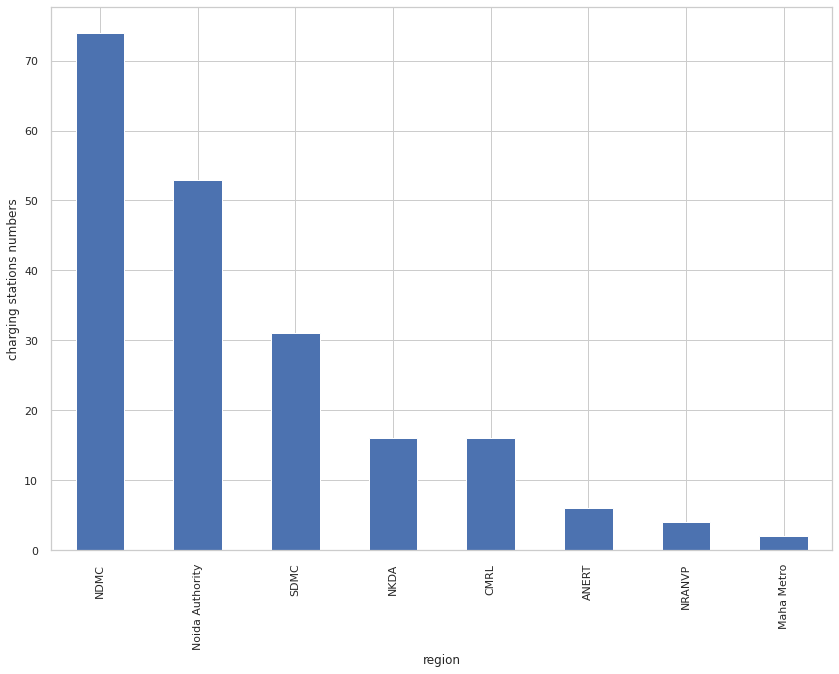

In [81]:
plt.figure(figsize=(14,10))

df_charge.region.value_counts().plot(kind="bar")
plt.xlabel("region")
plt.ylabel("charging stations numbers")
plt.show()

**Conclusion**

It is likely that in future electrical vehicle will be increased mostly in these two region because currently a large number of electric vehicle charging stations are more in these regions compare to other regions:
* NDMC:(New Delhi)
* Noida Authority:(City in Uttar Pradesh)